In [1]:
import cv2
import matplotlib.pyplot as plt
import glob
import pathlib

In [2]:
rpis = ['h2r1', 'h2r2', 'h2r3', 'h2r4']
methods = ['ilastik', 'optical_flow', 'region_growing', 'thresholding']
xor_imgs = []
n = 0

for rpi in rpis:
    annotated_masks = [cv2.imread(x) for x in sorted(glob.glob('../annotated_masks/' + rpi + '/*.jpg'))]
    names = [pathlib.Path(x).stem for x in sorted(glob.glob('../annotated_masks/' + rpi + '/*.jpg'))]
    print(rpi)
    for method in methods:
        print(method)
        found_masks = [cv2.imread(x) for x in sorted(glob.glob('../a_found_masks/' + method + '/' + rpi + '/*.jpg'))]
        for annotated_mask, found_mask, name in zip(annotated_masks, found_masks, names):
            if annotated_mask.shape != found_mask.shape:
                annotated_mask = cv2.resize(annotated_mask, (0,0), fx=0.5, fy=0.5)
            xor_img = (cv2.bitwise_xor(annotated_mask, found_mask))[:,:,0]
            xor_imgs.append(xor_img)
            cv2.imwrite(method + '/' + rpi + '/' + name + '.bmp', xor_img)



h2r1
ilastik
optical_flow
region_growing
thresholding
h2r2
ilastik
optical_flow
region_growing
thresholding
h2r3
ilastik
optical_flow
region_growing
thresholding
h2r4
ilastik
optical_flow
region_growing
thresholding


# No need to rerun the cells above if you already have the xor_imgs

## mask meaning: 
### if pixels are the same -> correct, pixel value in xor_img = 0 (black)
### if pixels are different -> incorrect, pixel value in xor_img = 255 (white)

In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import glob
import pathlib
import pandas as pd

(1296, 2304)
0


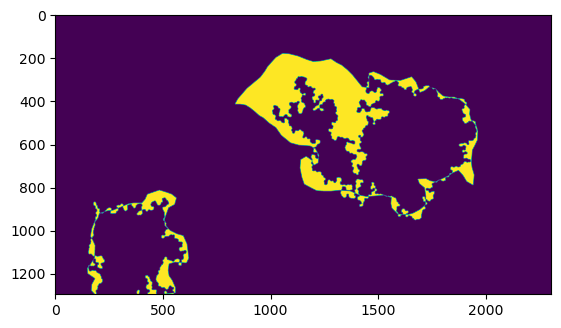

In [4]:
img = cv2.imread('ilastik/h2r1/hive2_rpi1_240419-194501Z.bmp')[:,:,0]
plt.imshow(img)
print(img.shape)
print(img[500][2000])

In [5]:
rpis = ['h2r1', 'h2r2', 'h2r3', 'h2r4']
methods = ['thresholding', 'region_growing', 'ilastik', 'optical_flow']
dfs_accuracy = []

# df = pd.DataFrame()

for rpi in rpis:
    if rpi == 'h2r1': name = 'hive2_rpi1_'
    if rpi == 'h2r2': name = 'hive2_rpi2_'
    if rpi == 'h2r3': name = 'hive2_rpi3_'
    if rpi == 'h2r4': name = 'hive2_rpi4_'
    names = [((pathlib.Path(x).stem).replace(name ,'')).replace('Z', '') for x in sorted(glob.glob('ilastik/' + rpi + '/*.bmp'))]
    df = pd.DataFrame()
    df.index = names
    df.index.name = rpi
    for method in methods:
        accuracies = []
        xor_imgs = [cv2.imread(x) for x in sorted(glob.glob(method + '/' + rpi + '/*.bmp'))]
        for xor_img in xor_imgs:
            correct_pixels = np.count_nonzero(xor_img[:,:,0] == 0)
            total_pixels = xor_img.shape[0] * xor_img.shape[1]
            accuracy = round((correct_pixels / total_pixels), 4)*100
            accuracies.append(accuracy)
        df[method] = accuracies
    df.to_csv('accuracies/' + df.index.name + '_accuracies.csv')
    dfs_accuracy.append(df)


In [6]:
dfs_accuracy[3].mean()

thresholding      90.675714
region_growing    87.248095
ilastik           92.625238
optical_flow      92.402857
dtype: float64

/var/folders/81/88qz8hc518d6msz681nh39mm0000gn/T/ipykernel_65630/3275345006.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(i-0.19+(j)*0.13, mean_accuracies.iloc[i][j], str(int(round(mean_accuracies.iloc[i][j], 0))) + '%', ha='center', va='bottom', fontsize=9)


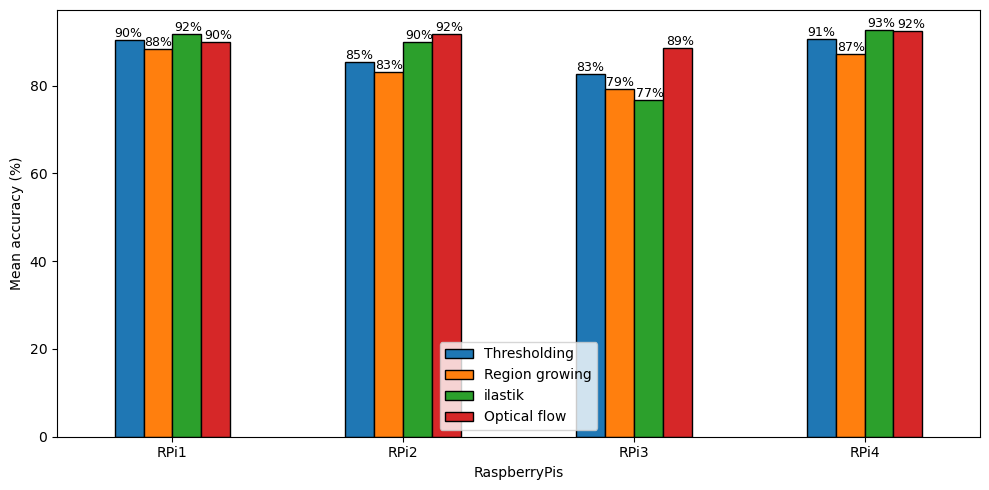

In [7]:
# make a list with all mean accuracies
mean_accuracies = []
for df in dfs_accuracy:
    mean_accuracies.append(df.mean())

# make a bar plot with the mean accuracies
mean_accuracies = pd.DataFrame(mean_accuracies)
mean_accuracies.plot(kind='bar', figsize=(10,5), edgecolor='black')
plt.ylabel('Mean accuracy (%)')
plt.xlabel('RaspberryPis')
# plt.title('Mean accuracy of the different methods per RPI', fontsize=20)
plt.xticks(np.arange(4), ['RPi1', 'RPi2', 'RPi3', 'RPi4'], rotation=0)
plt.legend(['Thresholding', 'Region growing', 'ilastik', 'Optical flow'])
# on top of each single bar, add the value of the mean accuracy
for i in range(4):
    for j in range(4):
        plt.text(i-0.19+(j)*0.13, mean_accuracies.iloc[i][j], str(int(round(mean_accuracies.iloc[i][j], 0))) + '%', ha='center', va='bottom', fontsize=9)
plt.tight_layout()
plt.savefig('mean_accuracies.png')
plt.show()
